# 第36课 数据科学家及12种聚类(无监督学习)算法简明源代码归纳


Python零基础学习建模：https://www.ixigua.com/home/77346806707?utm_source=xiguastudio

Python源文件及数据下载链接: https://github.com/rayc2020/LessonPythonCode

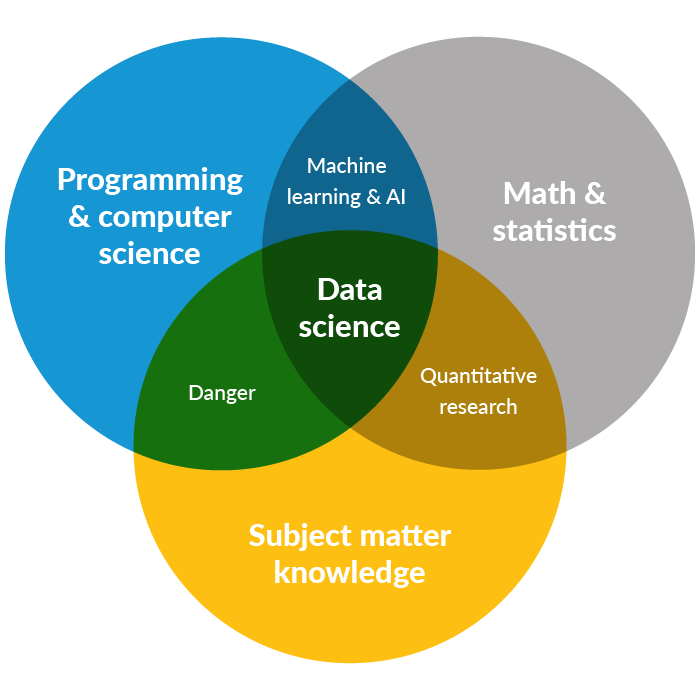

In [104]:
from IPython.display import Image
Image(filename='D:\\python\\Project0-Python-MachineLearning\\Lesson36-data_science_venn_diagram1.png')

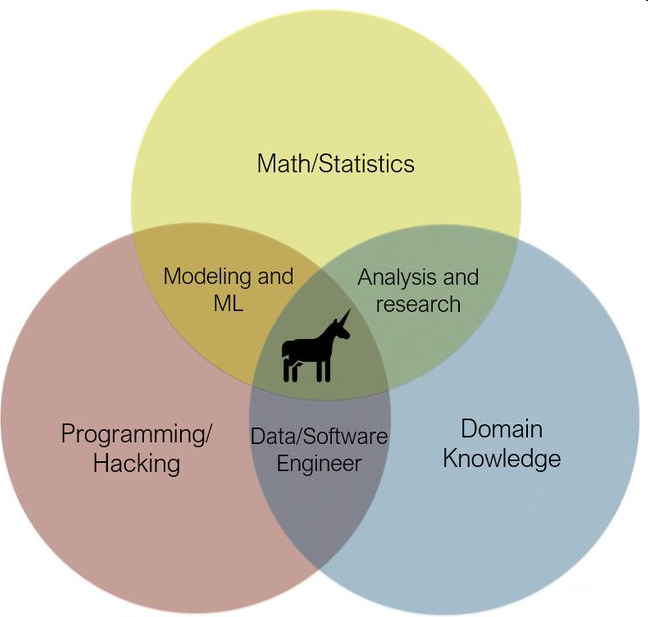

In [105]:
from IPython.display import Image
Image(filename='D:\\python\\Project0-Python-MachineLearning\\Lesson36-data_science_venn_diagram5.png')

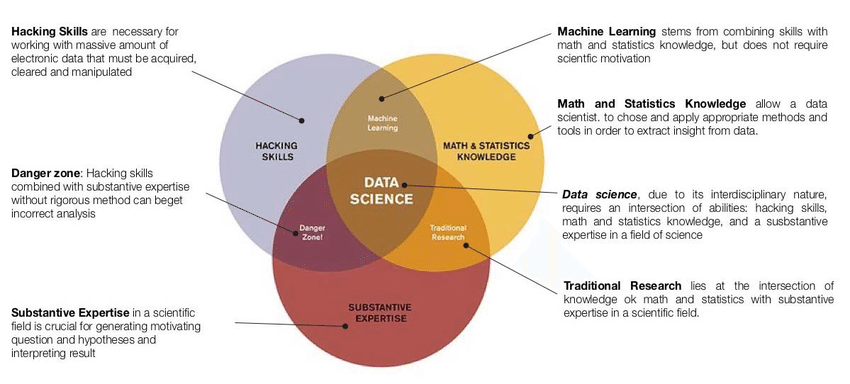

In [106]:
from IPython.display import Image
Image(filename='D:\\python\\Project0-Python-MachineLearning\\Lesson36-data_science_venn_diagram4.png')

In [107]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import sklearn.mixture as mixture
import time
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

#conda install -c conda-forge hdbscan
import hdbscan

An NPY file is a NumPy array file created by the Python software package with the NumPy library installed. 
... NumPy is a Python programming language library that provides support for large arrays and matrices. 
You can export an array to an NPY file by using np. save('filename. npy', array)

In [108]:
data = np.load('Lesson33-clusterable_data.npy')

In [109]:
data.shape

(2309, 2)

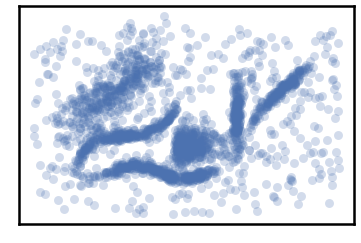

In [110]:
plt.scatter(data.T[0], data.T[1], c='b', **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

In [111]:
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(0.8, 0.2, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=16)

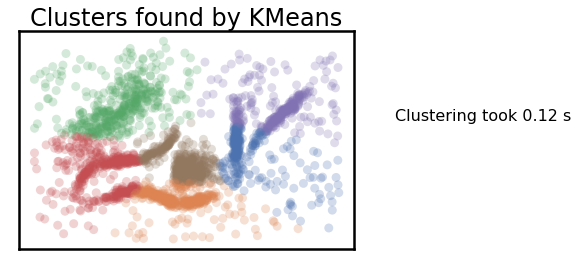

In [112]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':6})

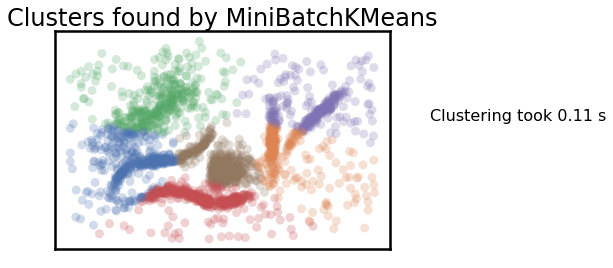

In [113]:
plot_clusters(data, cluster.MiniBatchKMeans, (), {'n_clusters':6})

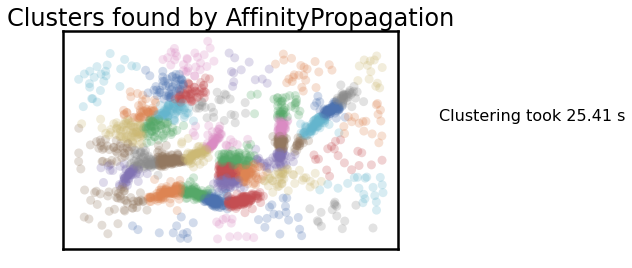

In [114]:
plot_clusters(data, cluster.AffinityPropagation, (), {'damping':0.95})

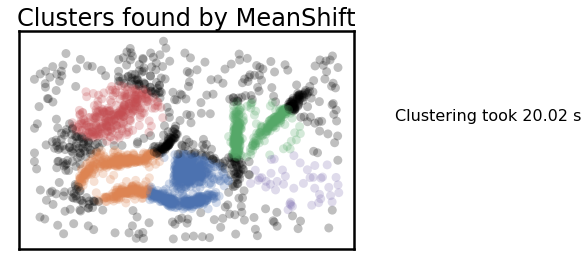

In [115]:
plot_clusters(data, cluster.MeanShift, (0.175,), {'cluster_all':False})

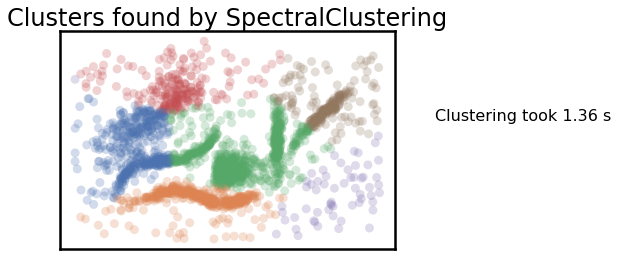

In [116]:
plot_clusters(data, cluster.SpectralClustering, (), {'n_clusters':6})

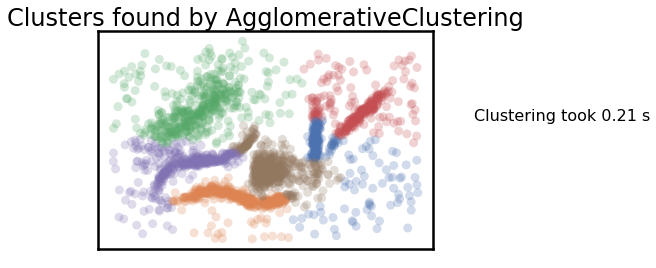

In [117]:
plot_clusters(data, cluster.AgglomerativeClustering, (), {'n_clusters':6, 'linkage':'ward'})

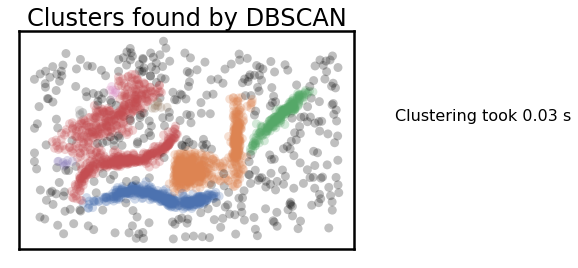

In [118]:
plot_clusters(data, cluster.DBSCAN, (), {'eps':0.025})

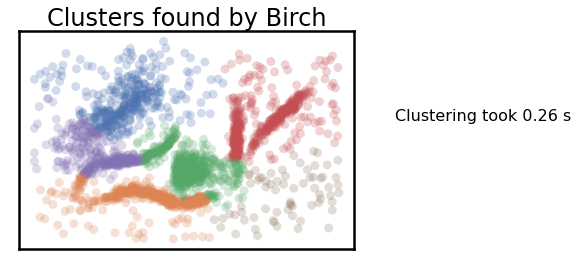

In [119]:
plot_clusters(data, cluster.Birch, (), {'threshold':0.01,'n_clusters':6})

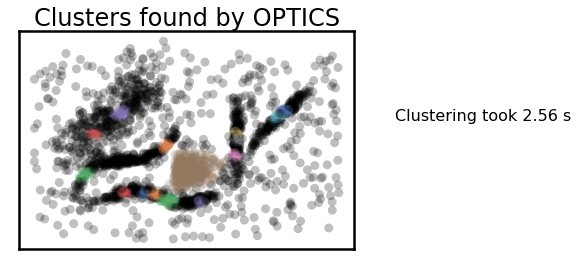

In [120]:
plot_clusters(data, cluster.OPTICS, (), {'min_samples':15})

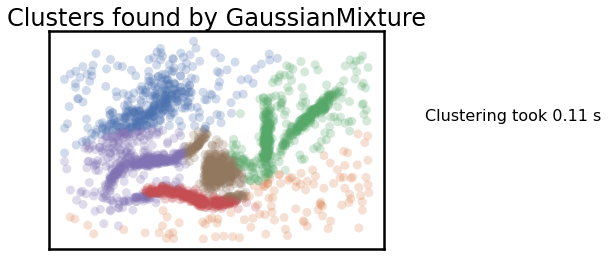

In [121]:
plot_clusters(data, mixture.GaussianMixture, (), {'n_components':6})

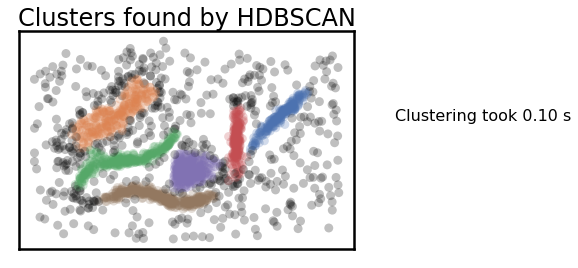

In [122]:
plot_clusters(data, hdbscan.HDBSCAN, (), {'min_cluster_size':15})